In this notebook, you'll combine the data you extracted last week with data showing the count of COVID cases by zip code.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

First, import the vaccines data (contained in the file `COVID_CountByZipPerDate 03292021.csv` in the `data` folder. Save it in a DataFrame named `cases`.

In [2]:
# Your Code Here

In [3]:
cases = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')

Take a look at this DataFrame so that you have an understanding of how it is structured.

In [4]:
cases

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
...,...,...,...
8827,3/27/2021,37210.0,1
8828,3/27/2021,37211.0,1
8829,3/27/2021,37212.0,1
8830,3/27/2021,37214.0,2


Aggregate the cases per zip code to get a total (cumulative) count of cases per zip code. Convert the result to a DataFrame named `total_cases`.

In [5]:
# Your Code Here

In [6]:
total_cases = cases.groupby('Zip')['Cases'].sum()
total_cases = total_cases.reset_index()
total_cases.Zip = total_cases.Zip.astype('int')

Create a plot showing the number of cases per zip code. Which zip code has the highest total number of cases?

In [7]:
# Your Code Here

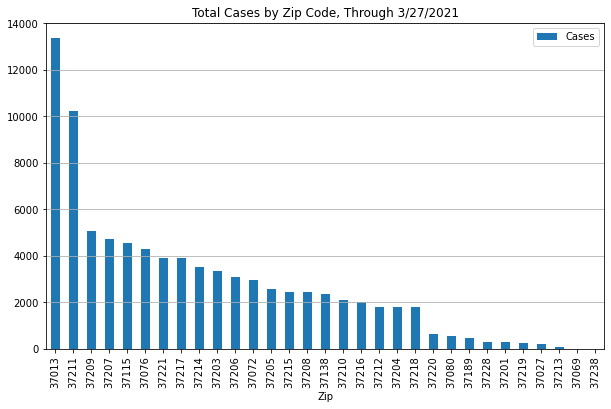

In [8]:
fig, ax = plt.subplots(figsize = (10,6))

total_cases.sort_values('Cases', ascending = False).plot(kind = 'bar', x = 'Zip', y = 'Cases', ax = ax)

plt.grid(axis = 'y')

plt.title('Total Cases by Zip Code, Through 3/27/2021');

Now we're going to incorporate some data retrieved from the census.

We can reuse the code from last week to fetch and prepare the race and hhinc DataFrames.

In [9]:
engine = create_engine('sqlite:///../data/census_data.sqlite')

In [10]:
query = '''
SELECT *
FROM race;
'''

race = pd.read_sql(query, con = engine)
race['pct_white'] = race['Not Hispanic or Latino_White alone'] / race['Total']

In [11]:
query = '''
SELECT *
FROM hhinc;
'''

hhinc = pd.read_sql(query, con = engine)

hhinc['Total_less_than_60000'] = hhinc[['Less than $10,000', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999',
       '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999',
       '$45,000 to $49,999', '$50,000 to $59,999']].sum(axis = 1)

hhinc['pct_less_than_60000'] = hhinc['Total_less_than_60000'] / hhinc['Total:']

hhinc['low_income'] = hhinc['pct_less_than_60000'] >= 0.5

We don't need all of the columns from these two dataframes. Slice `race` so that it only includes the 'geoid', 'zip', 'Total', and 'pct_white' columns and `hhinc` so that it only includes 'geoid', 'zip', and 'low_income'.

In [12]:
# Your Code Here

In [13]:
race = race[['geoid', 'zip', 'Total', 'pct_white']]

hhinc = hhinc[['geoid', 'zip', 'low_income']]

Prior to merging, it might make sense to rename the 'zip' columns in `race` and `hhinc` to `Zip` in order to match the column name in the `total_cases` DataFrame.

Also, rename the 'Total' column in race to 'population'.

In [14]:
# Your Code Here

In [15]:
race = race.rename(columns = {'zip': 'Zip', 'Total': 'population'})
hhinc = hhinc.rename(columns = {'zip': 'Zip'})

Do a series of two merges:

First, merge the `total_cases` DataFrame and the `race` DataFrame together and save the result back to `total_cases`.

Second, merge the `total_cases` DataFrame and the `hhinc` DataFrame together and save the result back to `total_cases`.

In [16]:
# Your Code Here

In [17]:
total_cases = pd.merge(left = total_cases, right = race)
total_cases = pd.merge(left = total_cases, right = hhinc)

Using the `Cases` and `population` columns, create a new calculated column, `cases_per_100000`.

In [18]:
# Your Code Here

In [19]:
total_cases['cases_per_100000'] = total_cases['Cases'] / total_cases['population'] * 100000

Create a bar plot to display this newly calculated column.

In [20]:
# Your Code Here

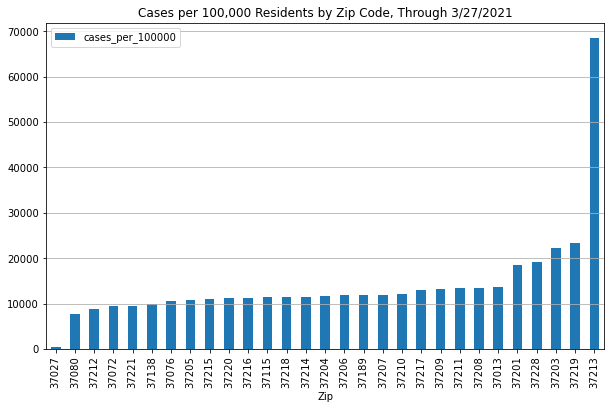

In [21]:
fig, ax = plt.subplots(figsize = (10,6))

total_cases.sort_values('cases_per_100000').plot(kind = 'bar', x = 'Zip', y = 'cases_per_100000', ax = ax)

plt.grid(axis = 'y')

plt.title('Cases per 100,000 Residents by Zip Code, Through 3/27/2021');

Look back at your `total_cases` DataFrame to investigate any zip codes with unusually high or low values. Why might these values be so high or low?

In [22]:
total_cases.sort_values('cases_per_100000')

,Zip,Cases,geoid,population,pct_white,low_income,cases_per_100000
1,37027,231,86000US37027,56117,0.837536,False,411.639966
4,37080,574,86000US37080,7394,0.937382,True,7763.051123
18,37212,1823,86000US37212,20803,0.714897,False,8763.159160
2,37072,2984,86000US37072,31492,0.754573,False,9475.422329
27,37221,3910,86000US37221,41017,0.811200,False,9532.632811
6,37138,2359,86000US37138,23784,0.802010,False,9918.432560
3,37076,4279,86000US37076,40161,0.654939,False,10654.615174
11,37205,2566,86000US37205,23790,0.887432,False,10786.044557
21,37215,2438,86000US37215,22379,0.872514,False,10894.141829
26,37220,656,86000US37220,5880,0.957483,False,11156.462585


In [23]:
fips = pd.read_excel('../data/ZIP_COUNTY_032019.xlsx')

In [24]:
fips = fips[['zip', 'county', 'res_ratio']]

In [25]:
pd.merge(left = total_cases, right = fips[fips.county == 47037].rename(columns = {'zip': 'Zip'})).sort_values('res_ratio')

,Zip,Cases,geoid,population,pct_white,low_income,cases_per_100000,county,res_ratio
1,37027,231,86000US37027,56117,0.837536,False,411.639966,47037,0.256304
2,37072,2984,86000US37072,31492,0.754573,False,9475.422329,47037,0.554965
4,37080,574,86000US37080,7394,0.937382,True,7763.051123,47037,0.559482
6,37138,2359,86000US37138,23784,0.802010,False,9918.432560,47037,0.666972
27,37221,3910,86000US37221,41017,0.811200,False,9532.632811,47037,0.962552
3,37076,4279,86000US37076,40161,0.654939,False,10654.615174,47037,0.979087
21,37215,2438,86000US37215,22379,0.872514,False,10894.141829,47037,0.996898
15,37209,5072,86000US37209,38664,0.583644,True,13118.146079,47037,0.999122
17,37211,10233,86000US37211,75955,0.523376,True,13472.450793,47037,0.999886
19,37213,65,86000US37213,95,0.800000,True,68421.052632,47037,1.000000


For the zip codes 37027, 37072, 37080, and 37138 at least 10% of the residents live outside of Davidson County. Remove the rows for these counties from the DataFrame.

You can use the code in the following cell to accomplish this.

We also want to remove any rows whose ZipCode is NaN, which can be accomplished with the code in this cell.

In [26]:
total_cases = total_cases[~total_cases['Zip'].isin([37027, 37072, 37080, 37138])]
total_cases = total_cases[~total_cases['Zip'].isna()]

**Question:** Does there appear to be any difference in cases_per_100000 for zip codes identified as low_income vs. those that are not?

In [27]:
# Your Code Here

In [28]:
total_cases.groupby('low_income')['cases_per_100000'].describe()

,count,mean,std,min,25%,50%,75%,max
low_income,,,,,,,,
False,12.0,12491.354247,4173.602575,8763.159160,10753.187211,11211.915739,11650.603450,23396.880416
True,13.0,18082.836534,15458.817913,11337.778549,11958.830670,13118.146079,13635.017715,68421.052632


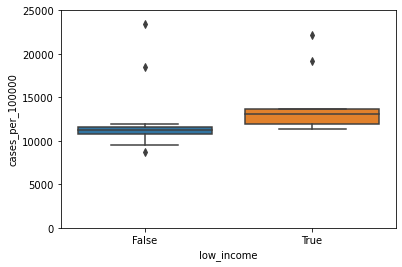

In [29]:
sns.boxplot(data = total_cases, x = 'low_income', y = 'cases_per_100000')

plt.ylim(0, 25000);

**Question:** Does there appear to be any relationship between a zip code's pct_white value and cases_per_100000 value?

In [30]:
# Your Code Here

In [31]:
total_cases[['pct_white', 'cases_per_100000']].corr()

,pct_white,cases_per_100000
pct_white,1.000000,0.183157
cases_per_100000,0.183157,1.000000


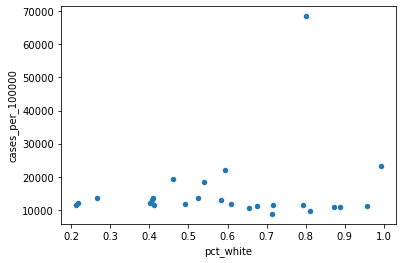

In [32]:
total_cases.plot(kind = 'scatter',
                x = 'pct_white',
                y = 'cases_per_100000');

Finally, we are going to be reusing the DataFrame that we have created in future weeks. To save your findings, you can use the `.to_csv()` method as the following cell shows. Run the following cell to save your work.

In [33]:
total_cases.to_csv('../data/total_cases.csv', index = False)